# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro, f_oneway,binom
from sklearn.linear_model import LinearRegression


In [4]:
pdf = pd.read_csv('petrol.csv')
pdf.head()
pdf.describe()

tax       income       highway         dl  consumption
count  48.000000    48.000000     48.000000  48.000000    48.000000
mean    7.668333  4241.833333   5565.416667   0.570333   576.770833
std     0.950770   573.623768   3491.507166   0.055470   111.885816
min     5.000000  3063.000000    431.000000   0.451000   344.000000
25%     7.000000  3739.000000   3110.250000   0.529750   509.500000
50%     7.500000  4298.000000   4735.500000   0.564500   568.500000
75%     8.125000  4578.750000   7156.000000   0.595250   632.750000
max    10.000000  5342.000000  17782.000000   0.724000   968.000000

# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [5]:
pdf.head()
pdf.shape
pdf.columns
pdf.dtypes

tax            float64
income           int64
highway          int64
dl             float64
consumption      int64
dtype: object

In [6]:
Q1 = pdf['tax'].quantile(0.25)
Q3 = pdf['tax'].quantile(0.75)
IQR = Q3 - Q1
print("Inter Quartile is {}".format(IQR))

Inter Quartile is 1.125


In [7]:
filtered = pdf.query('(@Q1 - 1.5 * @IQR) <= tax <= (@Q3 + 1.5 * @IQR)')
filtered.shape

(46, 5)

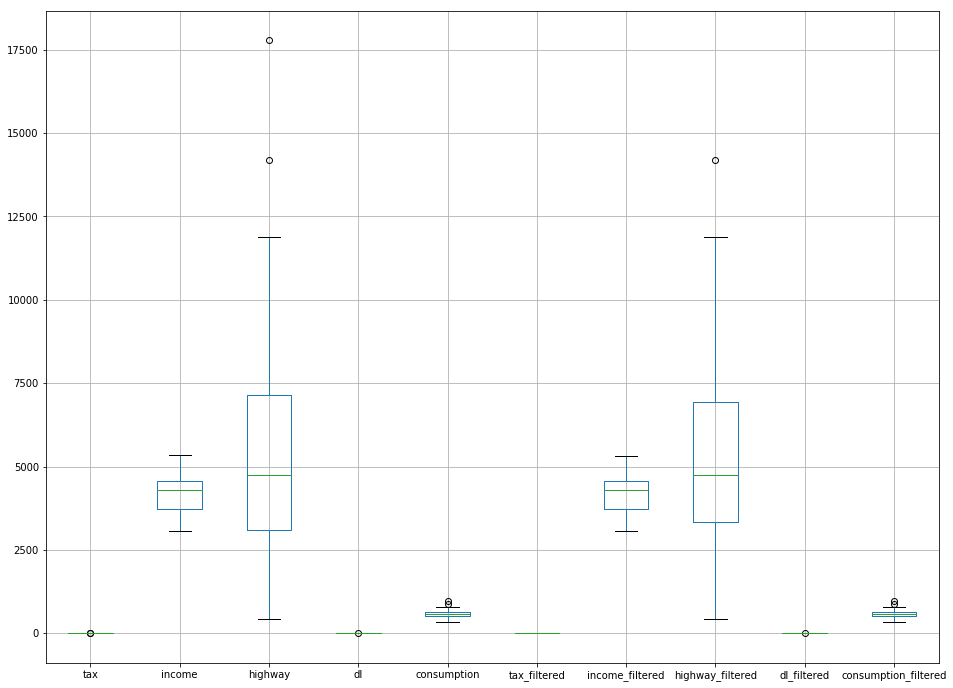

In [8]:

pdf.join(filtered, rsuffix='_filtered').boxplot(figsize=(16,12))
#plt.boxplot(filtered,width=100)

In [9]:
filtered.shape

(46, 5)

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

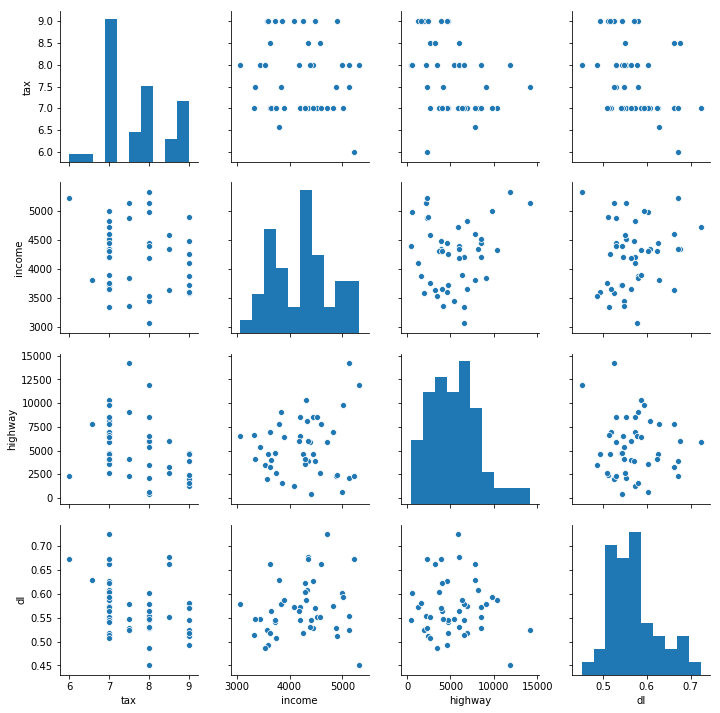

In [19]:
sns.pairplot(filtered)

In [21]:
import sympy
reduced_form, inds = sympy.Matrix(filtered.values).rref()
reduced_form

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [22]:
inds

(0, 1, 2, 3)

In [26]:
filtered.corr(method ='pearson')

tax    income   highway        dl
tax      1.000000 -0.133854 -0.353946 -0.349536
income  -0.133854  1.000000  0.153428  0.162882
highway -0.353946  0.153428  1.000000 -0.068962
dl      -0.349536  0.162882 -0.068962  1.000000

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

In [27]:
#Tax and Consumption is lowest =-0.437944 negatively coorelated
#Number of drivers  and Consumption is lowest =0.068962 Positively coorelated

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [31]:
#Y=filtered.consumption
Y.head()
#filtered.drop('consumption',axis=1, inplace=True)
filtered.head()

tax  income  highway     dl
0  9.0    3571     1976  0.525
1  9.0    4092     1250  0.572
2  9.0    3865     1586  0.580
3  7.5    4870     2351  0.529
4  8.0    4399      431  0.544

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(filtered, Y, test_size=0.2)
print ("X Training Shape is {} and Y Shape is {} ".format(X_train.shape, y_train.shape))
print ("X Testing Shape is {} and Y Shape is {} ".format(X_test.shape, y_test.shape))

X Training Shape is (36, 4) and Y Shape is (36,) 
X Testing Shape is (10, 4) and Y Shape is (10,) 


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [32]:
regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 433.15710428478826
Coefficients: 
 [-4.16077479e+01 -7.88044308e-02 -1.34394614e-03  1.42742257e+03]


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [34]:
r_sq = regr.score(filtered, Y)
print('coefficient of determination:',r_sq)

coefficient of determination: 0.6556432772488234


In [35]:
y_pred = regr.predict(X_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[747.08400027 562.84158649 398.90368503 652.07715201 568.40189823
 529.5730677  502.02982217 657.4297413  687.15596385 675.19949086]


In [51]:
#Validation of the predicted responses
y_pred = regr.intercept_ + -4.16077479e+01 * X_test.tax+-7.88044308e-02*X_test.income+-1.34394614e-03*X_test.highway+1.42742257e+03*X_test.dl
print('predicted response:', y_pred, sep='\n')

predicted response:
35    747.084000
9     562.841586
22    398.903685
41    652.077152
43    568.401898
4     529.573067
24    502.029822
14    657.429741
46    687.155963
32    675.199490
dtype: float64


In [52]:
X = sm.add_constant(X_train) # adding a constant
 
model = sm.OLS(y_train, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     20.27
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           2.72e-08
Time:                        23:47:19   Log-Likelihood:                -199.14
No. Observations:                  36   AIC:                             408.3
Df Residuals:                      31   BIC:                             416.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.1571    223.791      1.936      0.0

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [53]:
#Already included all the columns


# Question 9: Print the coefficients of the multilinear regression model

In [48]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 433.15710428478826
Coefficients: 
 [-4.16077479e+01 -7.88044308e-02 -1.34394614e-03  1.42742257e+03]


In [49]:
y_pred = regr.predict(X_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[747.08400027 562.84158649 398.90368503 652.07715201 568.40189823
 529.5730677  502.02982217 657.4297413  687.15596385 675.19949086]


In [50]:
#Validation

y_pred = regr.intercept_ + -4.16077479e+01 * X_test.tax+-7.88044308e-02*X_test.income+-1.34394614e-03*X_test.highway+1.42742257e+03*X_test.dl
print('predicted response:', y_pred, sep='\n')

predicted response:
35    747.084000
9     562.841586
22    398.903685
41    652.077152
43    568.401898
4     529.573067
24    502.029822
14    657.429741
46    687.155963
32    675.199490
dtype: float64


# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

In [ ]:
#We can see here that this model has a much higher R-squared value — 0.723
, meaning that this model explains 72.3% of the variance in our dependent variable